In [22]:
import pandas as pd
import missingno as msno
import numpy as np

In [23]:
train2021 = pd.read_csv('../데이터2/train_subway2021.csv')
train2022 = pd.read_csv('../데이터2/train_subway2022.csv')
train2023 = pd.read_csv('../데이터2/train_subway2023.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# concat으로 세 데이터프레임을 세로로 연결
df = pd.concat([train2021, train2022, train2023], ignore_index=True)

# 결과 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시간        int64  
 1   호선        int64  
 2   역번호       int64  
 3   역명        object 
 4   상하구분      object 
 5   AWS_지점코드  int64  
 6   기온        float64
 7   풍향        float64
 8   풍속        float64
 9   일강수량      float64
 10  시간강수량     float64
 11  상대습도      float64
 12  일사량       float64
 13  체감온도      float64
 14  혼잡도       int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB
None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   시간        int64  
 1   호선        int64  
 2   역번호       int64  
 3   역명        object 
 4   상하구분      object 
 5   AWS_지점코드  int64  
 6   기온        float64
 7   풍향        float64
 8   풍속        float64
 9   일강수량      float64
 10  시간강수량     float64
 11  상대습도      float64
 12  일사량       float64
 13  체감온도      float64
 14  혼잡도       int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB


In [ ]:
# '시간' 열을 문자열로 변환한 후 datetime으로 파싱
df['시간'] = pd.to_datetime(df['시간'].astype(str), format='%Y%m%d%H')
# 기준 시간 범위 생성 (3년치 모든 시각: 매시간 단위)
full_time_range = pd.date_range(start='2021-01-01 00:00', end='2023-12-31 23:00', freq='H')
# 데이터에 실제로 존재하는 고유 시간
actual_times = df['시간'].drop_duplicates().sort_values()

# 누락된 시간
missing_times = full_time_range.difference(actual_times)

# 누락된 시각 출력
print(f"누락된 시간 수: {len(missing_times)}")
print(missing_times)

누락된 시간 수: 3600
DatetimeIndex(['2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-02 02:00:00',
               '2021-01-02 03:00:00', '2021-01-02 04:00:00',
               '2021-01-03 02:00:00', '2021-01-03 03:00:00',
               '2021-01-03 04:00:00', '2021-01-04 02:00:00',
               ...
               '2023-12-28 04:00:00', '2023-12-29 02:00:00',
               '2023-12-29 03:00:00', '2023-12-29 04:00:00',
               '2023-12-30 02:00:00', '2023-12-30 03:00:00',
               '2023-12-30 04:00:00', '2023-12-31 02:00:00',
               '2023-12-31 03:00:00', '2023-12-31 04:00:00'],
              dtype='datetime64[ns]', length=3600, freq=None)


In [ ]:
import pandas as pd
import holidays

# 요일 숫자: 월=0, 일=6
df['요일숫자'] = df['시간'].dt.weekday

# 요일 문자: ex) '월', '화', ...
weekday_map = ['월', '화', '수', '목', '금', '토', '일']
df['요일문자'] = df['요일숫자'].apply(lambda x: weekday_map[x])

# 한국 공휴일 확인용 객체 (연도 범위 자동 처리)
years = df['시간'].dt.year.unique()
kr_holidays = holidays.KR(years=years)

# 공휴일 여부 열 추가 (1: 공휴일, 0: 평일)
df['공휴일여부'] = df['시간'].dt.date.apply(lambda x: 1 if x in kr_holidays else 0)

print(df)


                          시간  호선   역번호   역명 상하구분  AWS_지점코드   기온     풍향   풍속  \
0        2021-01-01 00:00:00   1   150  서울역   상선       419 -9.6  291.1  3.3   
1        2021-01-01 01:00:00   1   150  서울역   상선       419 -9.7  284.6  2.0   
2        2021-01-01 05:00:00   1   150  서울역   상선       419 -9.3  124.7  2.4   
3        2021-01-01 06:00:00   1   150  서울역   상선       419 -9.3  126.2  1.7   
4        2021-01-01 07:00:00   1   150  서울역   상선       419 -9.1  145.7  1.3   
...                      ...  ..   ...  ...  ...       ...  ...    ...  ...   
16369319 2023-12-31 19:00:00   8  2828  남위례   하선       572  0.6    0.0  0.0   
16369320 2023-12-31 20:00:00   8  2828  남위례   하선       572  0.0  354.7  0.0   
16369321 2023-12-31 21:00:00   8  2828  남위례   하선       572 -0.6    0.0  0.0   
16369322 2023-12-31 22:00:00   8  2828  남위례   하선       572 -0.8    0.0  0.0   
16369323 2023-12-31 23:00:00   8  2828  남위례   하선       572 -1.3  110.7  0.1   

          일강수량  시간강수량  상대습도   일사량  체감온도  혼잡도  요일숫자 

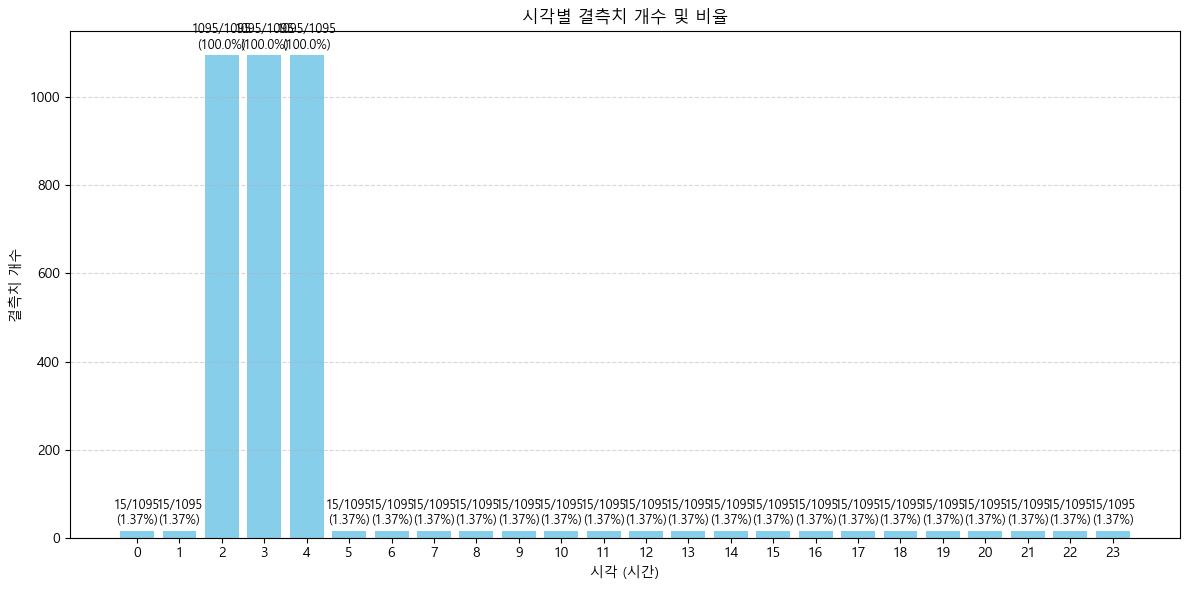

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows 기준)
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 예시 데이터프레임 (실제 데이터로 대체)
# df = pd.read_csv('your_file.csv')  # 예시입니다. 실제 데이터 불러오기 필요

# 1. '시간' 컬럼 datetime 변환 (자동 형식 인식)
df['시간'] = pd.to_datetime(df['시간'], errors='coerce')

# 2. 전체 시간 범위 (2021~2023, 1시간 단위)
full_time_range = pd.date_range(start='2021-01-01 00:00', end='2023-12-31 23:00', freq='H')

# 3. 실제 존재하는 시간 값
actual_times = df['시간'].dropna().drop_duplicates()

# 4. 누락된 시간 계산
missing_times = full_time_range.difference(actual_times)

# 5. 시각별 개수 세기
missing_hour_counts = missing_times.to_series().dt.hour.value_counts().sort_index()
valid_hour_counts = actual_times.dt.hour.value_counts().reindex(range(24), fill_value=0)

# 6. 시각별 총 발생 수 = 유효 + 결측
total_hour_counts = missing_hour_counts.add(valid_hour_counts, fill_value=0).astype(int)

# 7. 결측 비율 계산
missing_rate = (missing_hour_counts / total_hour_counts * 100).round(2)

# 8. 바 차트 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_hour_counts.index, missing_hour_counts.values, color='skyblue')
plt.xticks(range(24))
plt.xlabel('시각 (시간)')
plt.ylabel('결측치 개수')
plt.title('시각별 결측치 개수 및 비율')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 9. 막대 위에 숫자 출력 (결측 개수 / 전체 / 비율)
for i, bar in enumerate(bars):
    hour = bar.get_x() + bar.get_width() / 2
    missing = int(missing_hour_counts.get(i, 0))
    total = total_hour_counts.get(i, 0)
    percent = missing_rate.get(i, 0)
    label = f'{missing}/{total}\n({percent}%)'
    plt.text(hour, bar.get_height() + 10, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import holidays

# 2시, 3시, 4시 제외한 결측 시간 필터링
filtered_missing_times = missing_times[~missing_times.to_series().dt.hour.isin([2, 3, 4])]

# 날짜만 추출 (datetime.date 아님!)
filtered_missing_dates = pd.to_datetime(filtered_missing_times).normalize()
unique_dates = pd.Series(filtered_missing_dates).drop_duplicates().sort_values().reset_index(drop=True)

# 요일 문자 매핑
weekday_map = ['월', '화', '수', '목', '금', '토', '일']

# 공휴일 객체 생성 (결측 날짜의 연도 기준)
years = unique_dates.dt.year.unique()
kr_holidays = holidays.KR(years=years)

# 요일 문자, 공휴일 여부 계산
result = pd.DataFrame({
    '날짜': unique_dates,
})
result['요일숫자'] = result['날짜'].dt.weekday
result['요일문자'] = result['요일숫자'].apply(lambda x: weekday_map[x])
result['공휴일여부'] = result['날짜'].dt.date.apply(lambda x: 1 if x in kr_holidays else 0)

# 요일 숫자 제거하고 출력
result = result.drop(columns='요일숫자')
print(result)


           날짜 요일문자  공휴일여부
0  2022-01-22    토      0
1  2022-03-03    목      0
2  2022-03-05    토      0
3  2022-03-06    일      0
4  2022-03-07    월      0
5  2022-03-08    화      0
6  2022-03-09    수      1
7  2022-03-10    목      0
8  2022-10-01    토      0
9  2022-10-04    화      0
10 2022-11-22    화      0
11 2022-12-17    토      0
12 2022-12-20    화      0
13 2022-12-21    수      0
14 2023-03-13    월      0


In [9]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   시간        datetime64[ns]
 1   호선        int64         
 2   역번호       int64         
 3   역명        object        
 4   상하구분      object        
 5   AWS_지점코드  int64         
 6   기온        float64       
 7   풍향        float64       
 8   풍속        float64       
 9   일강수량      float64       
 10  시간강수량     float64       
 11  상대습도      float64       
 12  일사량       float64       
 13  체감온도      float64       
 14  혼잡도       int64         
 15  요일숫자      int32         
 16  요일문자      object        
 17  공휴일여부     int64         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(5), object(3)
memory usage: 2.1+ GB
                   시간  호선  역번호   역명 상하구분  AWS_지점코드   기온     풍향   풍속  일강수량  \
0 2021-01-01 00:00:00   1  150  서울역   상선       419 -9.6  291.1  3.3   0.0   
1 2021-01-01 01:00:00   1  150  서울역   상선

In [ ]:
# -99를 결측치로 바꾸기
df.replace(-99, np.nan, inplace=True)
missing_counts = df.isnull().sum()
missing_ratio = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    '결측치 수': missing_counts,
    '결측률 (%)': missing_ratio.round(2)
})

print(missing_df[missing_df['결측치 수'] > 0])

         결측치 수  결측률 (%)
기온      216468     1.32
풍향      230786     1.41
풍속      230786     1.41
일강수량    351574     2.15
시간강수량   360796     2.20
상대습도    844594     5.16
일사량    6064242    37.05
체감온도       352     0.00


In [11]:
missing_df

,결측치 수,결측률 (%)
시간,0,0.00
호선,0,0.00
역번호,0,0.00
역명,0,0.00
상하구분,0,0.00
AWS_지점코드,0,0.00
기온,216468,1.32
풍향,230786,1.41
풍속,230786,1.41
일강수량,351574,2.15


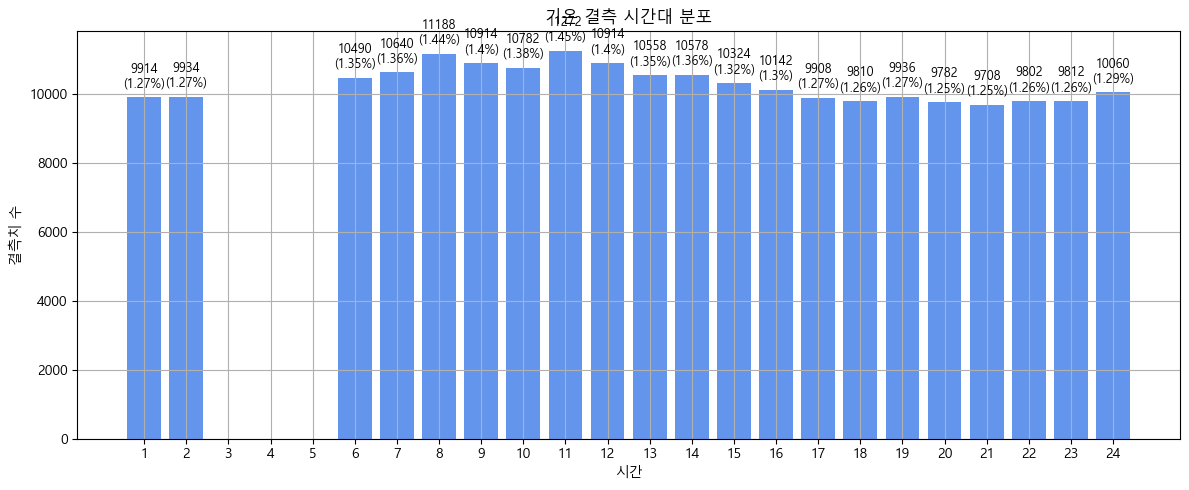

In [ ]:
import matplotlib.pyplot as plt

# 시간대별 전체 수와 결측치 수
hourly_total = df['시간'].dt.hour.value_counts().sort_index()
hourly_missing = df[df['기온'].isnull()]['시간'].dt.hour.value_counts().sort_index()

# 비율 계산 (%)
hourly_missing_rate = (hourly_missing / hourly_total * 100).round(2)

# 시각화
plt.figure(figsize=(12, 5))
bars = plt.bar(hourly_missing.index, hourly_missing, color='cornflowerblue')

# 타이틀 및 레이블
plt.title('기온 결측 시간대 분포')
plt.xlabel('시간')
plt.ylabel('결측치 수')

# x축을 0~23까지 고정하여 표시
plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)], rotation=0)

plt.grid(True)

# 막대 위에 값 표시 (개수 및 비율)
for bar in bars:
    hour = int(bar.get_x() + bar.get_width() / 2)
    count = int(hourly_missing.get(hour, 0))  # 값이 없을 수도 있으므로 get 사용
    rate = hourly_missing_rate.get(hour, 0.0)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count}\n({rate}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [24]:
# 📌 기상 데이터의 결측치 현황을 시간(hour), 월(month), 연도(year) 단위로 시각화하는 함수들
import pandas as pd
import matplotlib.pyplot as plt

# 시간 컬럼을 datetime 형식으로 변환
df['시간'] = pd.to_datetime(df['시간'])

# 분석 대상 열
target_columns = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

# 🕒 시간 단위 결측치 시각화 함수
def plot_missing_by_hour(df, column):
    df_time = df.copy()
    df_time['hour'] = df_time['시간'].dt.hour
    
    total = df_time['hour'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['hour'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='skyblue')
    plt.title(f'{column} 결측치 - 시간(Hour) 단위 분포')
    plt.xlabel('Hour')
    plt.ylabel('결측치 수')
    plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)], rotation=0)
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 📅 월 단위 결측치 시각화 함수
def plot_missing_by_month(df, column):
    df_time = df.copy()
    df_time['month'] = df_time['시간'].dt.month
    
    total = df_time['month'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['month'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='salmon')
    plt.title(f'{column} 결측치 - 월(Month) 단위 분포')
    plt.xlabel('Month')
    plt.ylabel('결측치 수')
    plt.xticks(ticks=range(1, 13), labels=[f'{i}월' for i in range(1, 13)])
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 📆 연도 단위 결측치 시각화 함수
def plot_missing_by_year(df, column):
    df_time = df.copy()
    df_time['year'] = df_time['시간'].dt.year
    
    total = df_time['year'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['year'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='mediumseagreen')
    plt.title(f'{column} 결측치 - 연도(Year) 단위 분포')
    plt.xlabel('Year')
    plt.ylabel('결측치 수')
    plt.xticks(rotation=45)
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
def plot_missing_block_distribution(df, column):
    print(f'\n📉 [{column}] 연속 결측 블록 분포 분석')

    df_sorted = df.sort_values('시간').reset_index(drop=True)
    is_null = df_sorted[column].isnull()
    group = (is_null != is_null.shift()).cumsum()

    # 연속 결측 블록 추출
    null_blocks = df_sorted[is_null].groupby(group)
    null_lengths = null_blocks.size().reset_index(name='length')
    length_counts = null_lengths['length'].value_counts().sort_index()

    print(length_counts.head(10))  # 상위 10개 출력

    # 시각화
    plt.figure(figsize=(10, 5))
    length_counts.plot(kind='bar', color='gray')
    plt.title(f'{column} 결측 블록 길이 분포')
    plt.xlabel('연속 결측 길이 (개)')
    plt.ylabel('블록 수')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# 함수 실행 코드 
for col in target_columns:
    print(f'\n📊 [{col}] 결측치 분석')

    # 🕒 시간 단위
    print(f'\n🕒 {col} 결측치 - 시간(hour) 단위')
    plot_missing_by_hour(df, col)

    # 📅 월 단위
    print(f'\n📅 {col} 결측치 - 월(month) 단위')
    plot_missing_by_month(df, col)

    # 📆 연도 단위
    print(f'\n📆 {col} 결측치 - 연도(year) 단위')
    plot_missing_by_year(df, col)

    # 📉 연속 결측 블록 분포
    plot_missing_block_distribution(df, col)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시간 파생 컬럼 생성 (사용자의 데이터셋에서 이미 이 컬럼들이 있다면 생략해도 됩니다)
df['month'] = df['시간'].dt.month
df['day'] = df['시간'].dt.day
df['hour'] = df['시간'].dt.hour

# 시각화 함수 정의
def plot_hourly_missing_by_day_per_month(df, column):
    for month in range(1, 13):
        monthly_data = df[df['month'] == month]
        days_in_month = sorted(monthly_data['day'].unique())
        num_days = len(days_in_month)
        ncols = 7
        nrows = int(np.ceil(num_days / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(22, nrows * 3), sharey=True)
        fig.suptitle(f'{month}월 일별 시간대별 {column} 결측치 수', fontsize=18)
        axes = axes.flatten()

        for i, day in enumerate(days_in_month):
            daily_data = monthly_data[monthly_data['day'] == day]
            missing_by_hour = daily_data.groupby('hour')[column].apply(lambda x: x.isnull().sum())

            ax = axes[i]
            bars = ax.bar(missing_by_hour.index.astype(str), missing_by_hour.values, color='#FF7043')
            ax.set_title(f'{day}일')
            ax.set_xticks(range(0, 24))
            ax.set_xticklabels(range(0, 24), rotation=45)
            ax.set_xlabel('시간')
            if i % ncols == 0:
                ax.set_ylabel('결측치 수')

            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                            ha='center', va='bottom', fontsize=7)

        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# 결측치 시각화할 열 목록
columns_to_plot = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

# 모든 열에 대해 시각화 반복 실행
for col in columns_to_plot:
    plot_hourly_missing_by_day_per_month(df, col)


In [ ]:
import pandas as pd

# 분석 대상 열
columns = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

# 이상치 판별 결과 저장용
outlier_summary = []

for col in columns:
    # 결측치 제외한 값으로 분석
    series = df[col].dropna()

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_count = len(outliers)
    total_count = len(series)
    outlier_ratio = round(outlier_count / total_count * 100, 2)

    outlier_summary.append({
        '열': col,
        '전체 개수': total_count,
        '이상치 개수': outlier_count,
        '이상치 비율(%)': outlier_ratio
    })

# 결과 출력
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


       열     전체 개수   이상치 개수  이상치 비율(%)
0     기온  16152856      204       0.00
1     풍향  16138538        0       0.00
2     풍속  16138538   483864       3.00
3   일강수량  16017750  2889949      18.04
4  시간강수량  16008528   932780       5.83
5   상대습도  15524730        0       0.00
6    일사량  10305082        0       0.00
7   체감온도  16368972      724       0.00


In [29]:
# ✅ 시간(hour) 단위 이상치 시각화 함수
def plot_outliers_by_hour(df, column):
    df_time = df.copy()
    df_time['hour'] = df_time['시간'].dt.hour

    # IQR 기반 이상치 판단
    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['hour'].value_counts().sort_index()
    outliers = df_time[is_outlier]['hour'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='orange')
    plt.title(f'{column} 이상치 - 시간(Hour) 단위 분포')
    plt.xlabel('Hour')
    plt.ylabel('이상치 수')
    plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)])

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [30]:
# ✅ 월(month) 단위 이상치 시각화 함수
def plot_outliers_by_month(df, column):
    df_time = df.copy()
    df_time['month'] = df_time['시간'].dt.month

    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['month'].value_counts().sort_index()
    outliers = df_time[is_outlier]['month'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='tomato')
    plt.title(f'{column} 이상치 - 월(Month) 단위 분포')
    plt.xlabel('Month')
    plt.ylabel('이상치 수')
    plt.xticks(ticks=range(1, 13), labels=[f'{i}월' for i in range(1, 13)])

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [31]:
#✅ 연도(year) 단위 이상치 시각화 함수
def plot_outliers_by_year(df, column):
    df_time = df.copy()
    df_time['year'] = df_time['시간'].dt.year

    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['year'].value_counts().sort_index()
    outliers = df_time[is_outlier]['year'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='forestgreen')
    plt.title(f'{column} 이상치 - 연도(Year) 단위 분포')
    plt.xlabel('Year')
    plt.ylabel('이상치 수')
    plt.xticks(rotation=45)

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



===== 🔍 기온 이상치 시각화 =====


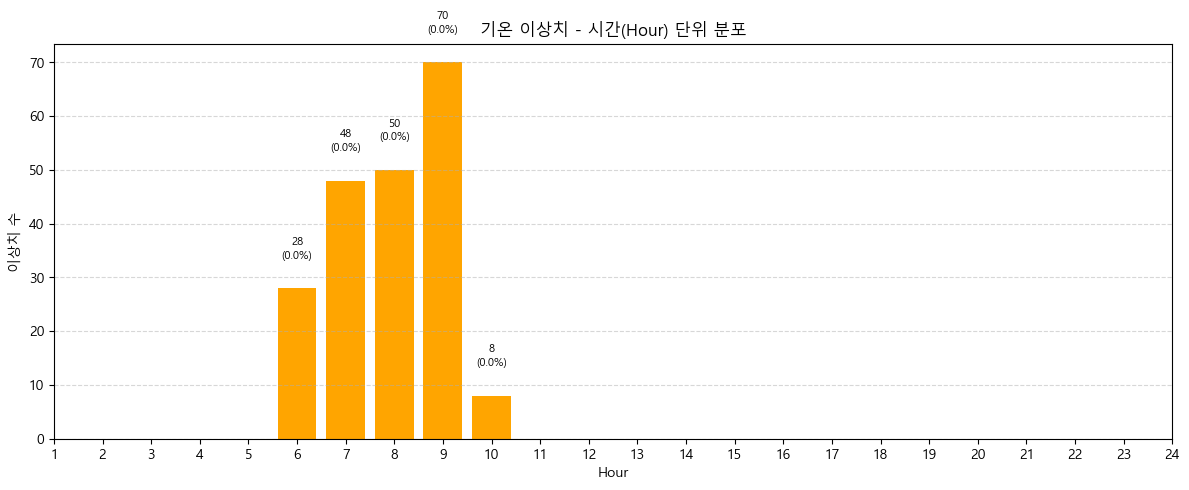

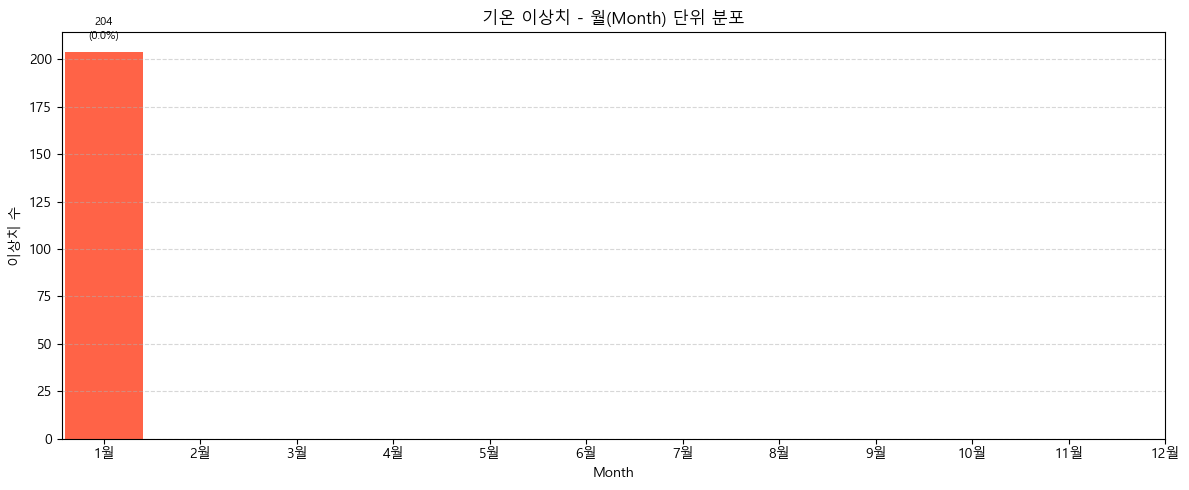

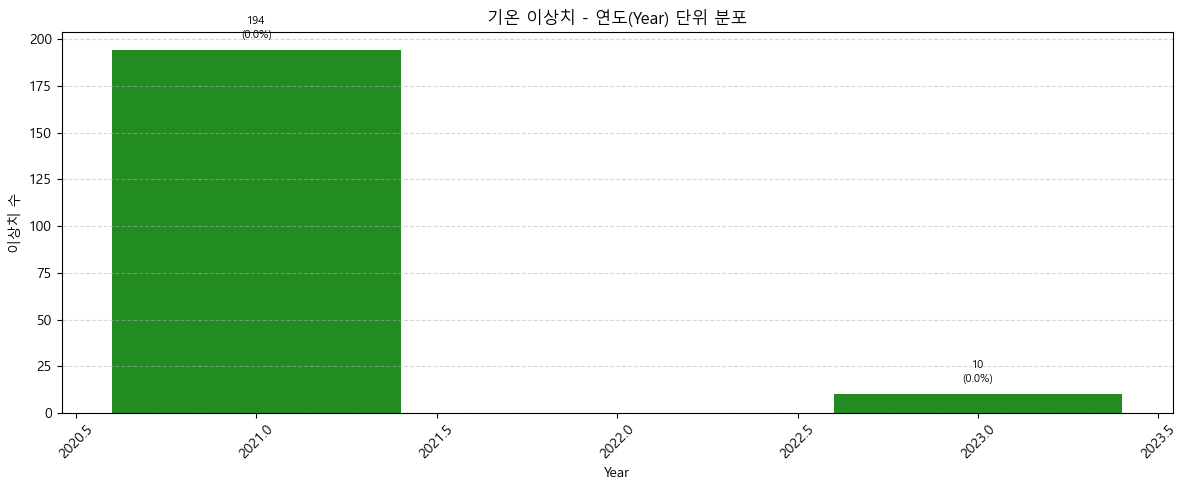


===== 🔍 풍향 이상치 시각화 =====


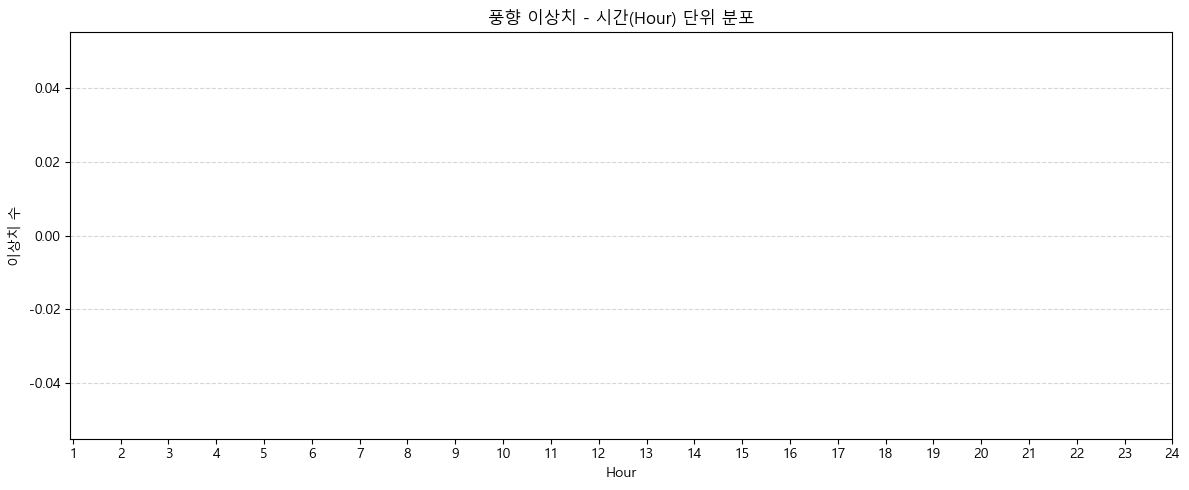

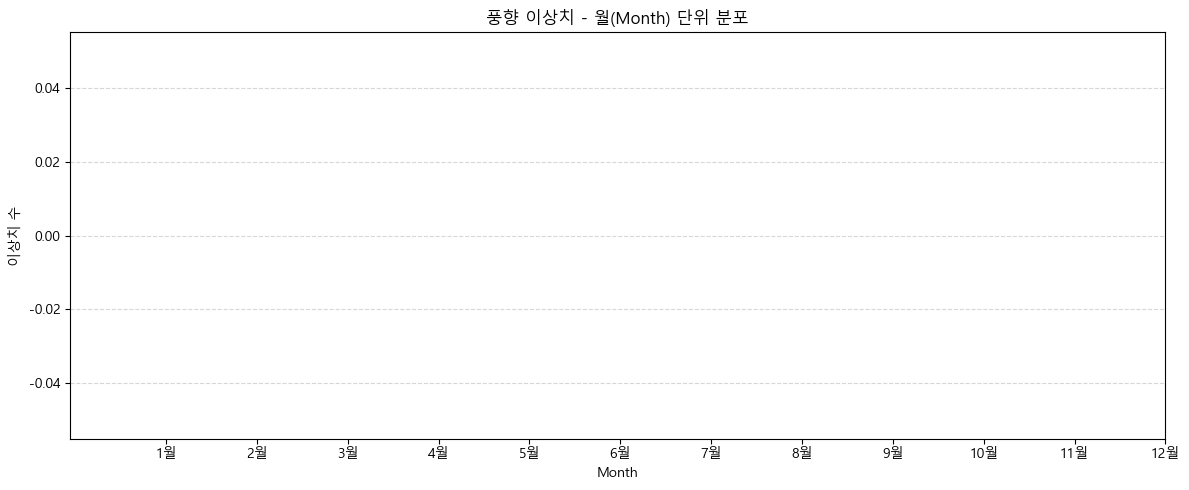

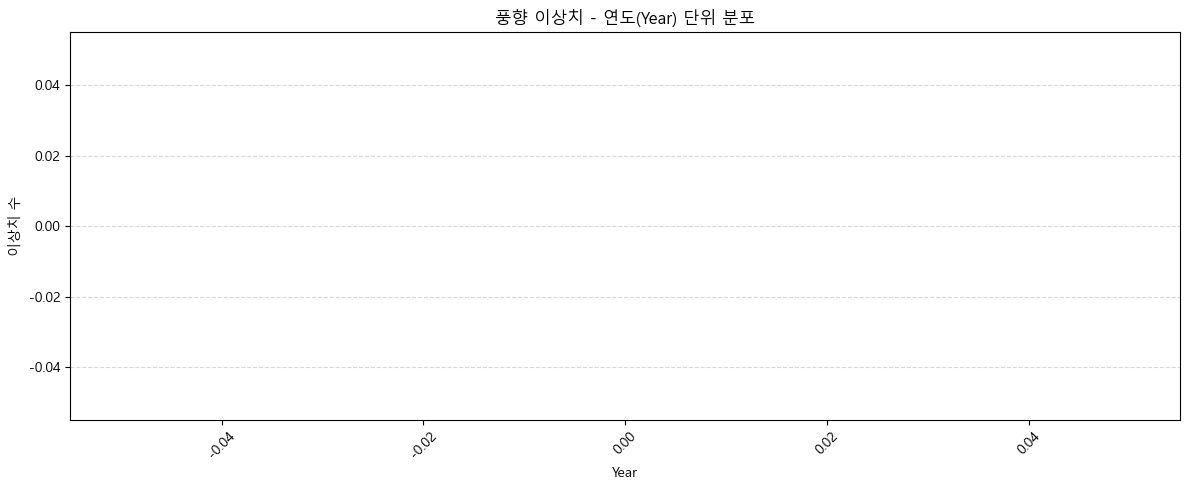


===== 🔍 풍속 이상치 시각화 =====


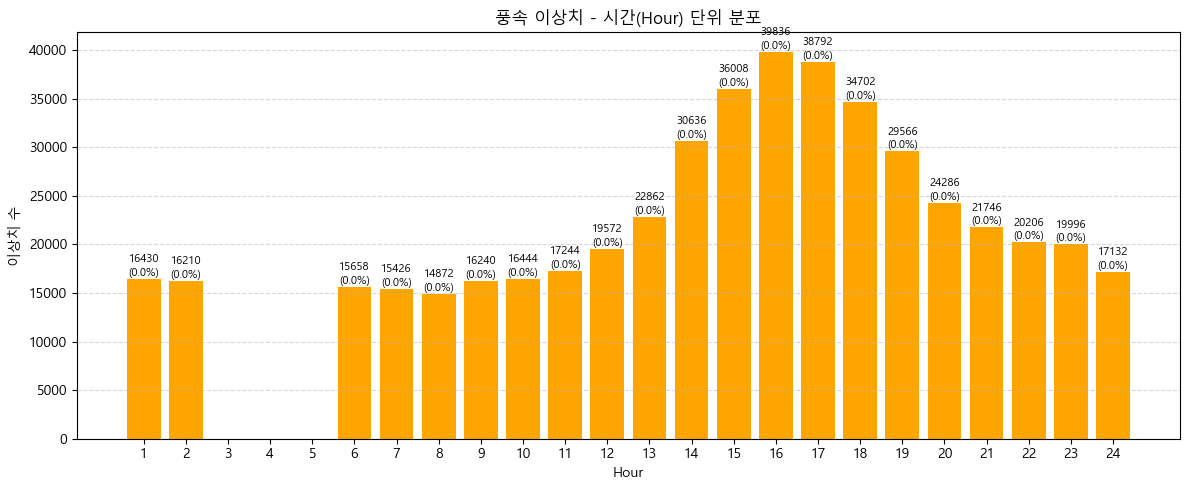

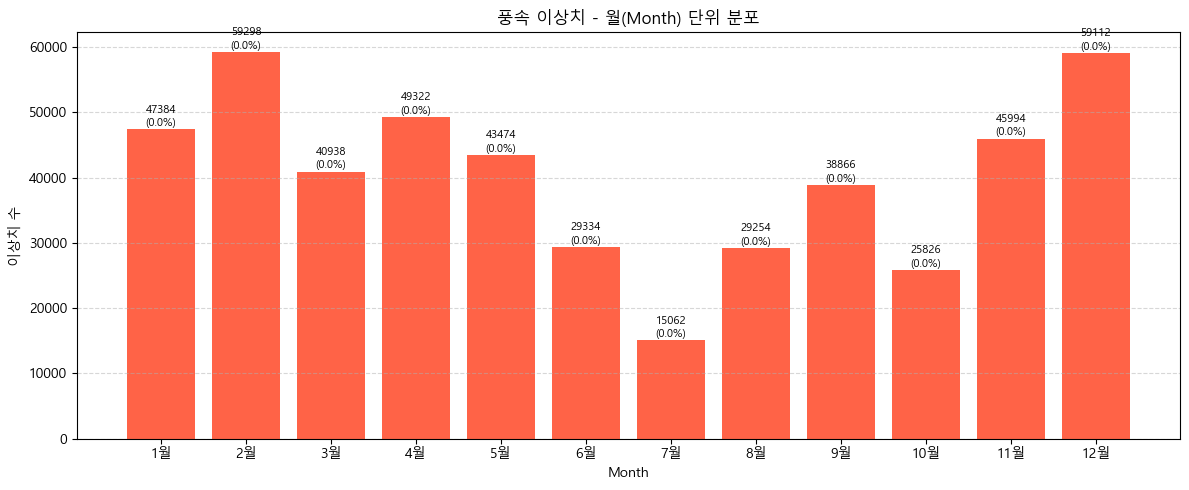

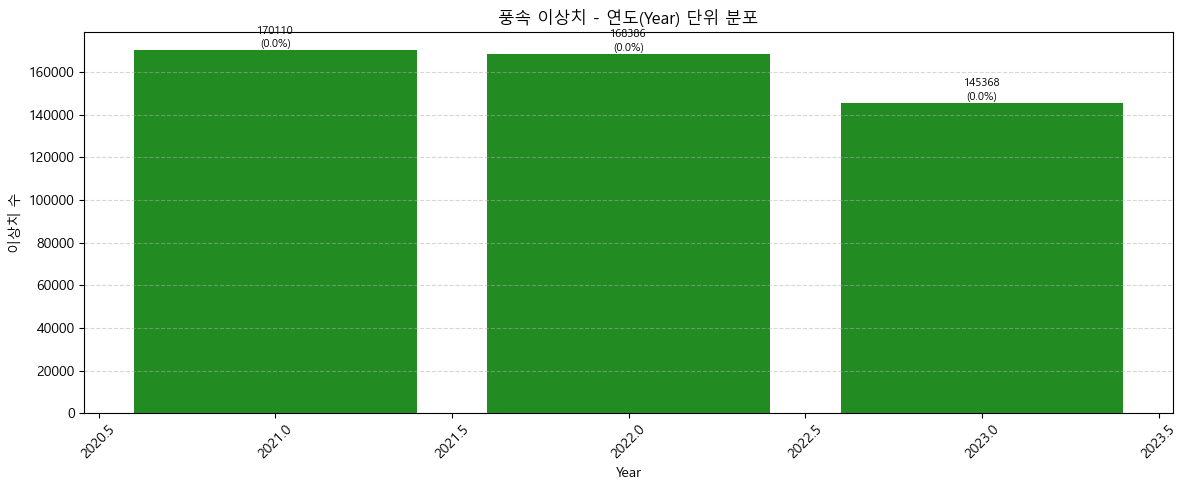


===== 🔍 일강수량 이상치 시각화 =====


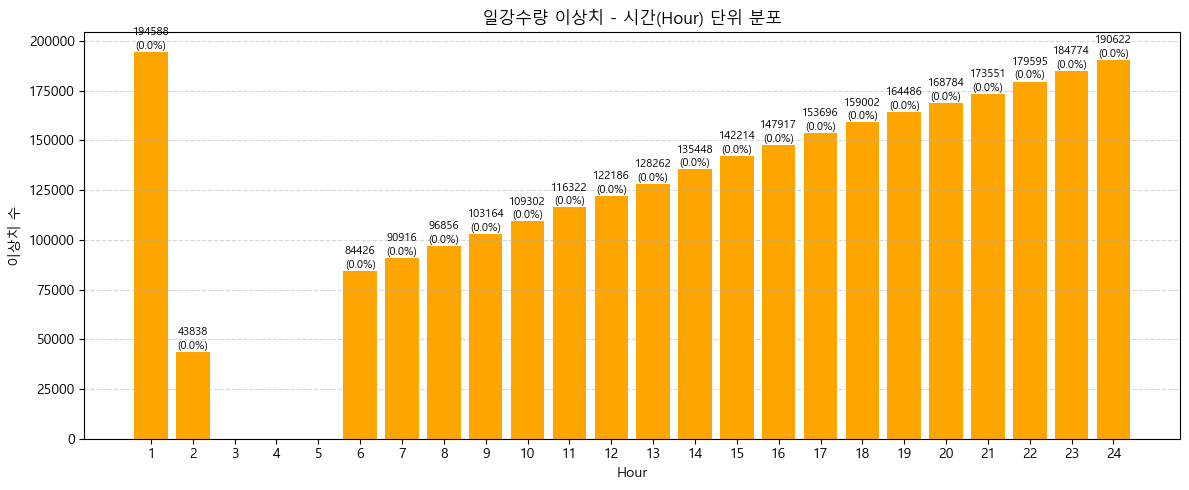

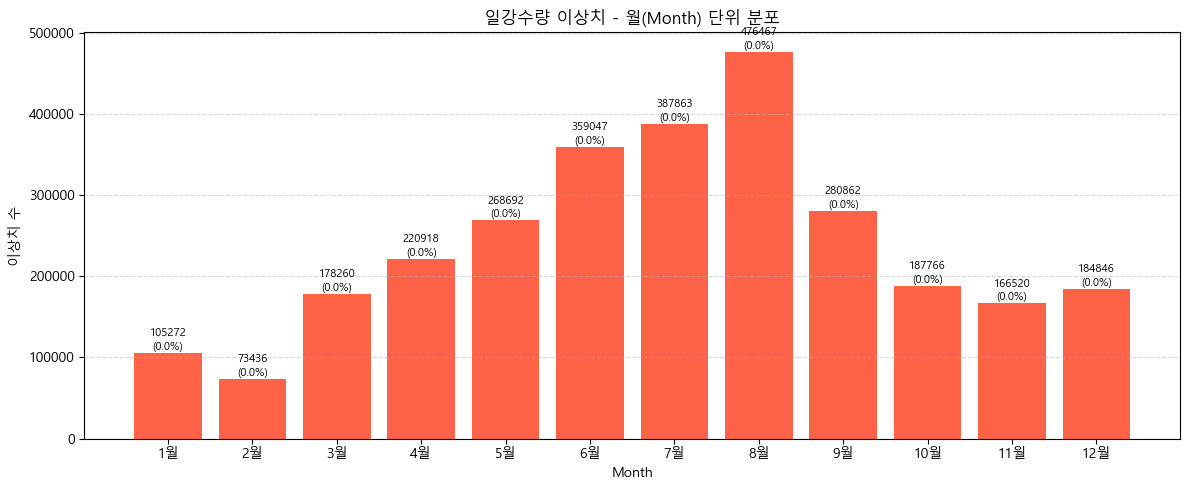

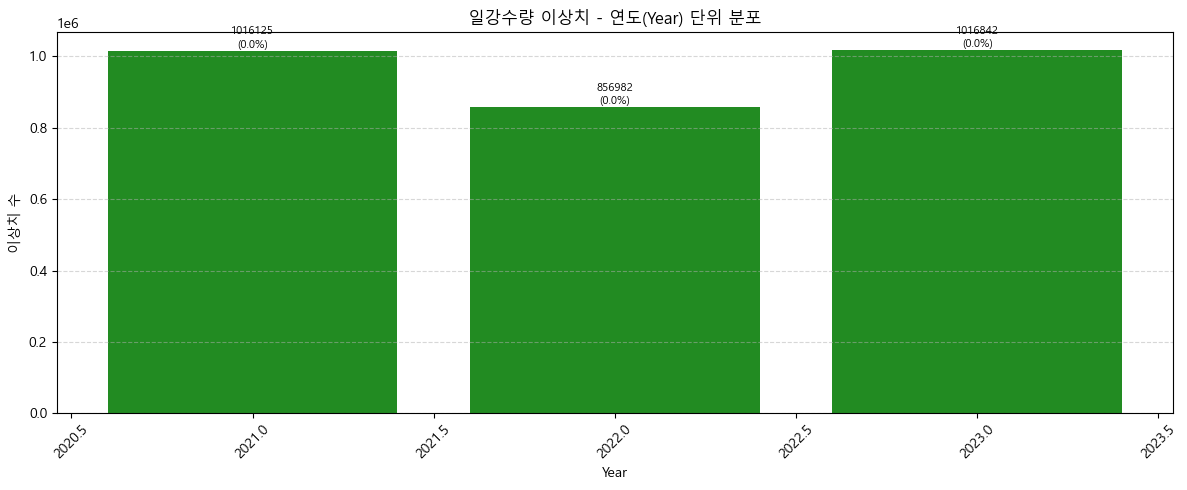


===== 🔍 시간강수량 이상치 시각화 =====


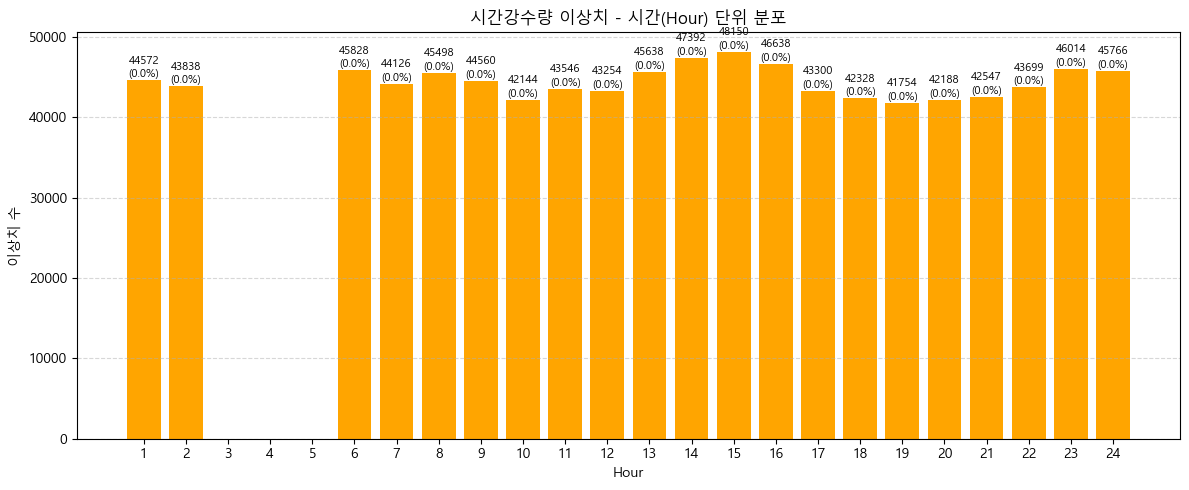

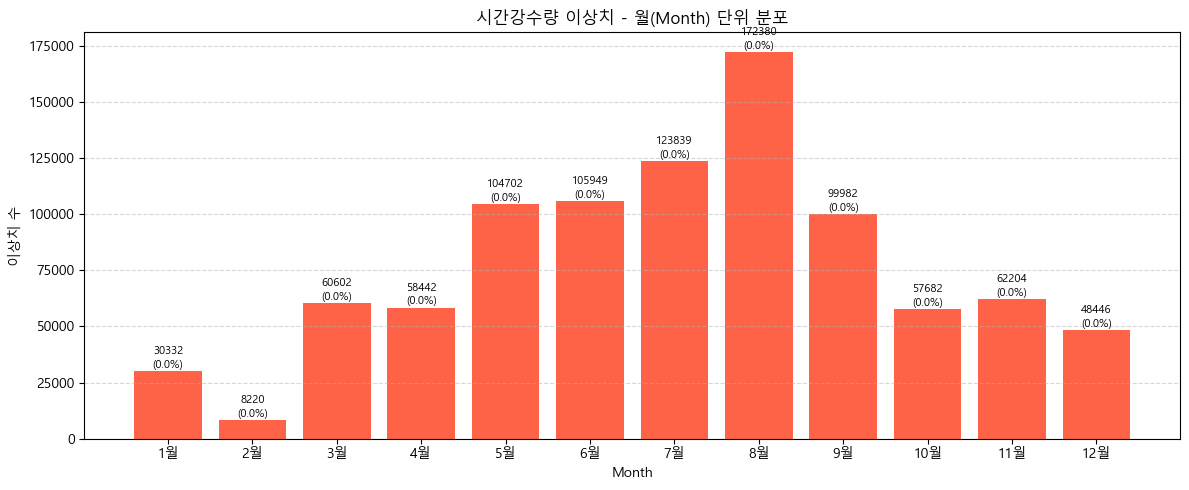

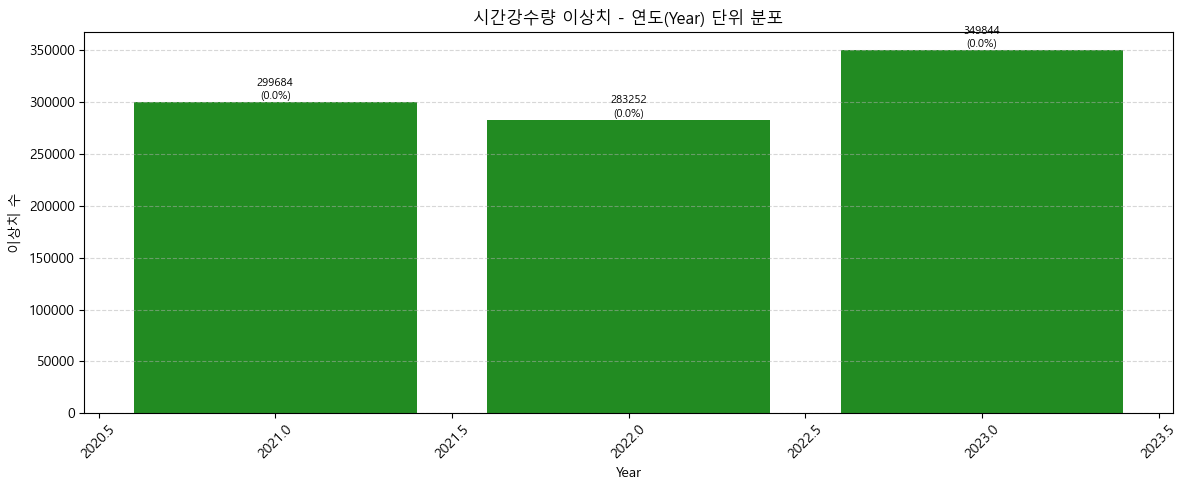


===== 🔍 상대습도 이상치 시각화 =====


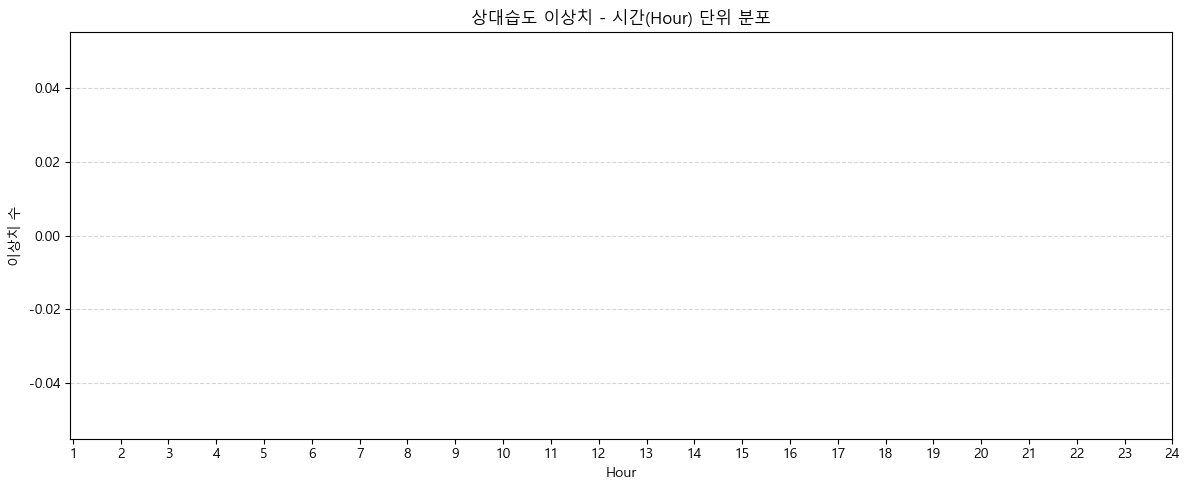

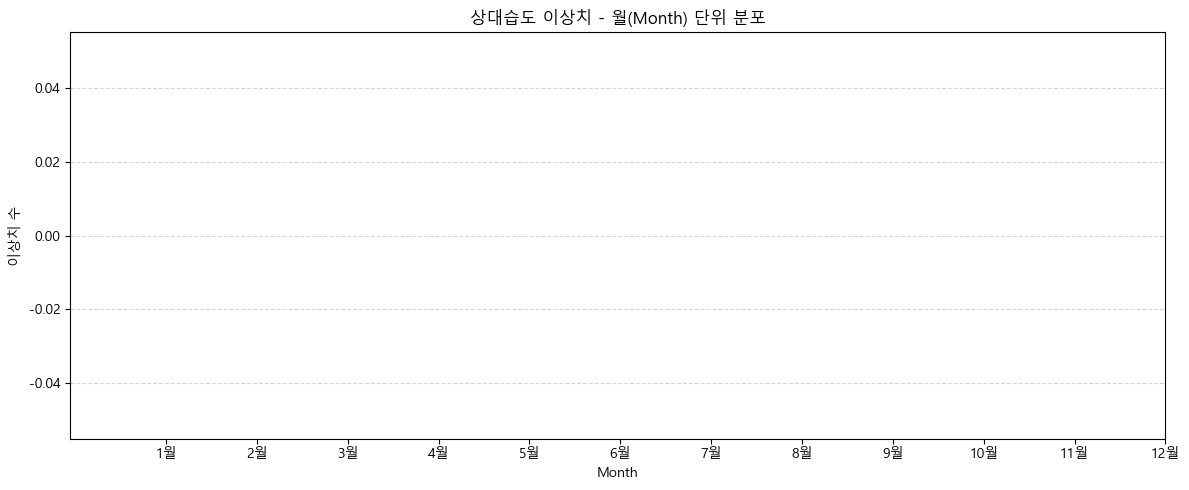

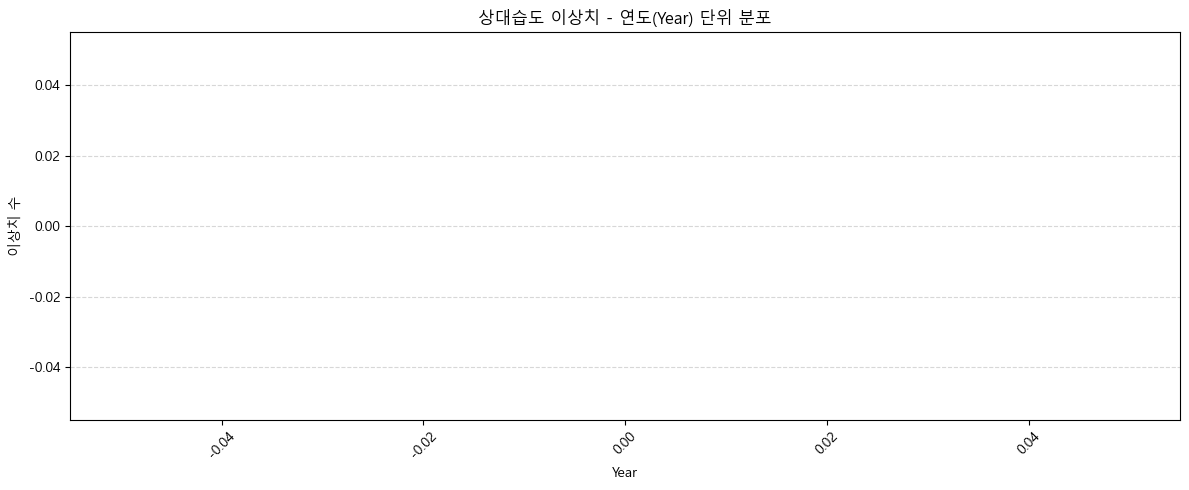


===== 🔍 일사량 이상치 시각화 =====


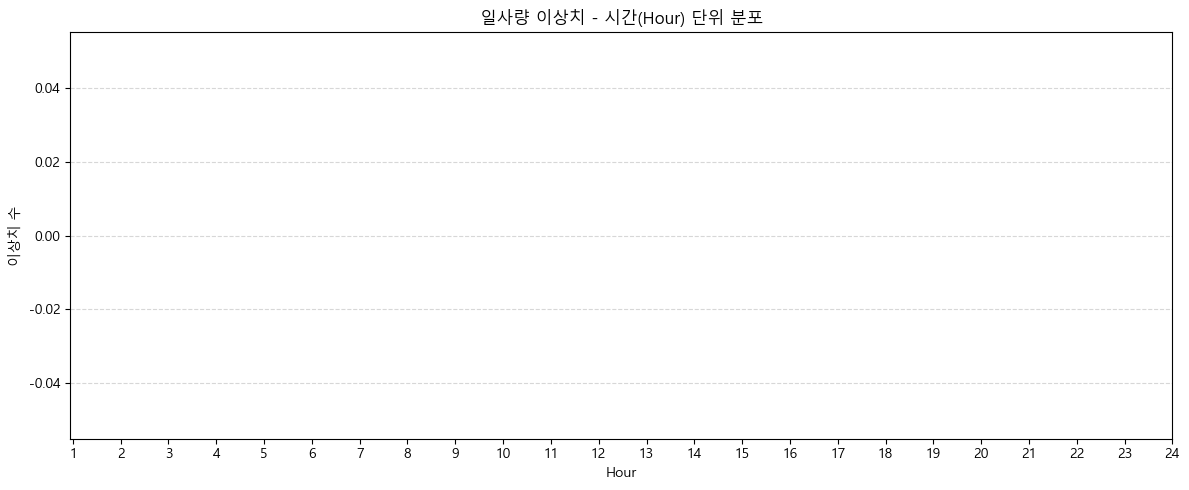

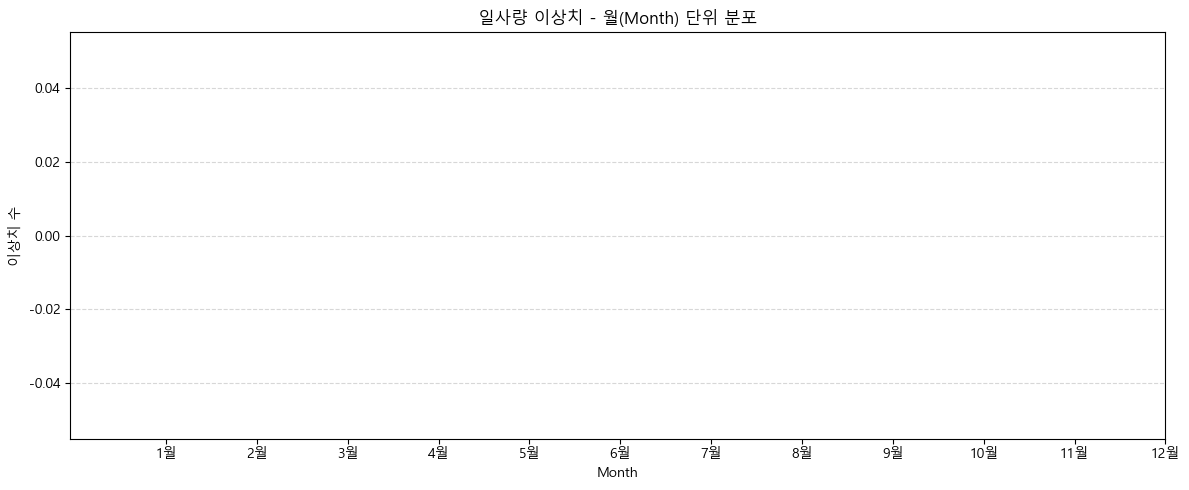

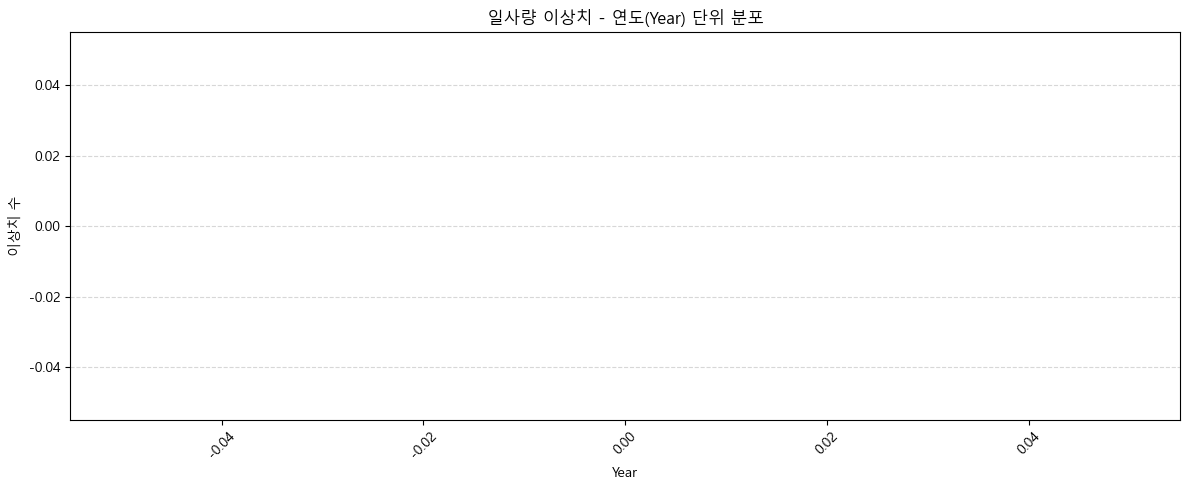


===== 🔍 체감온도 이상치 시각화 =====


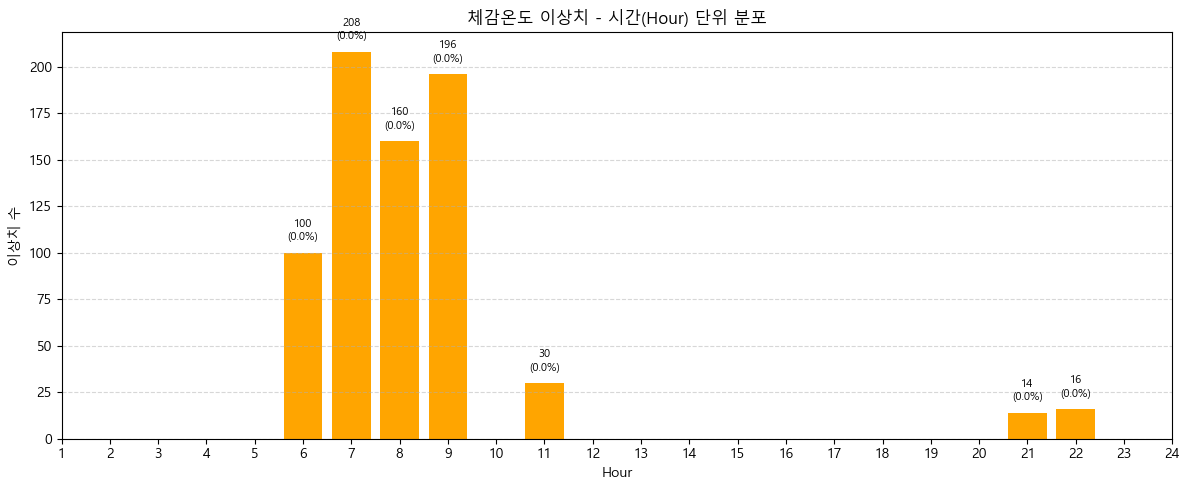

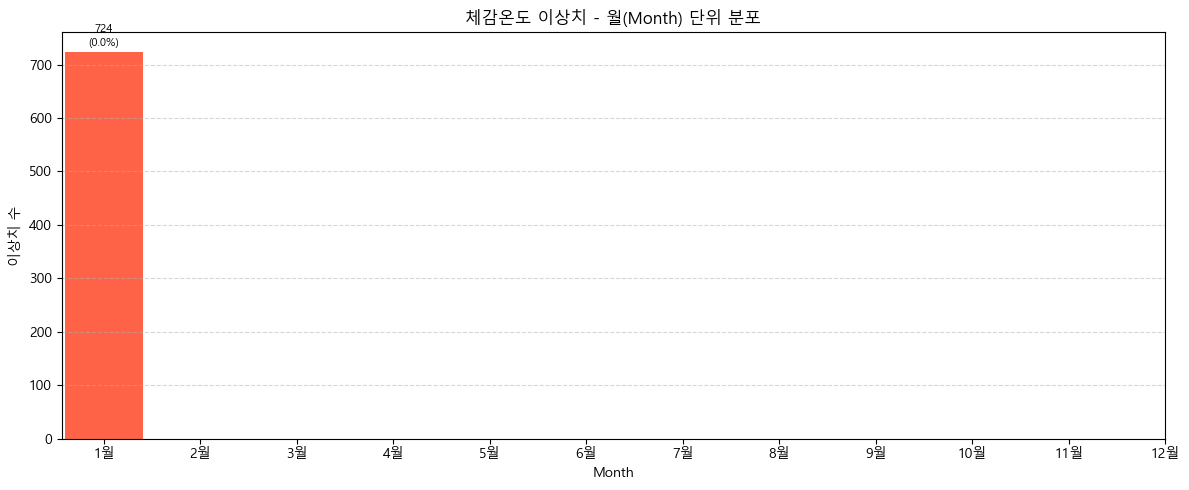

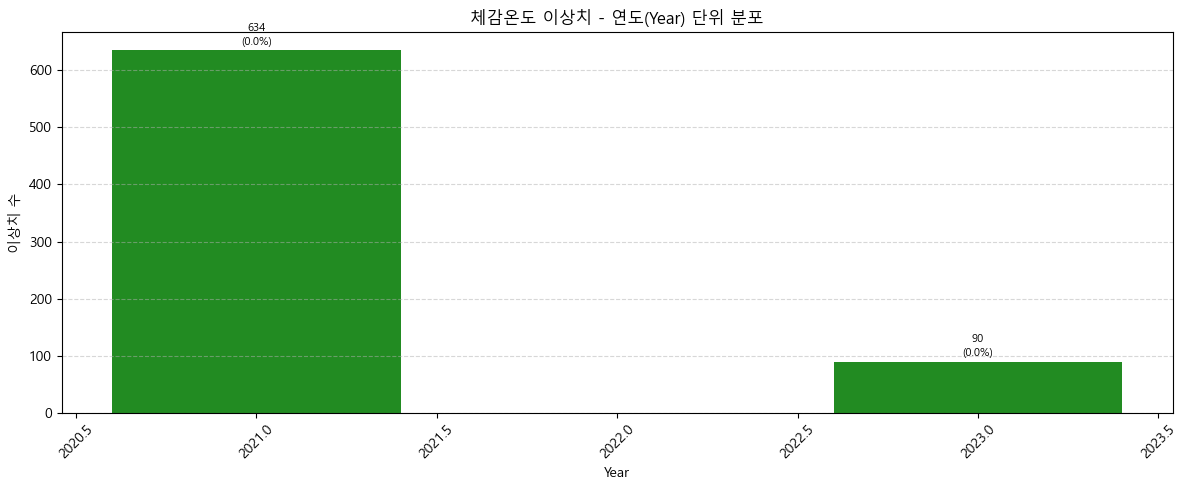

In [32]:
# 분석 대상 열
target_columns = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']

# 전체 열 반복 실행
for col in target_columns:
    print(f'\n===== 🔍 {col} 이상치 시각화 =====')
    plot_outliers_by_hour(df, col)
    plot_outliers_by_month(df, col)
    plot_outliers_by_year(df, col)


이상치 값:
291422     -21.2
299087     -21.2
306752     -21.2
314417     -21.2
322082     -21.2
            ... 
11697335   -21.0
14611712   -21.0
14619356   -21.0
14627000   -21.0
14634644   -21.0
Name: 기온, Length: 204, dtype: float64


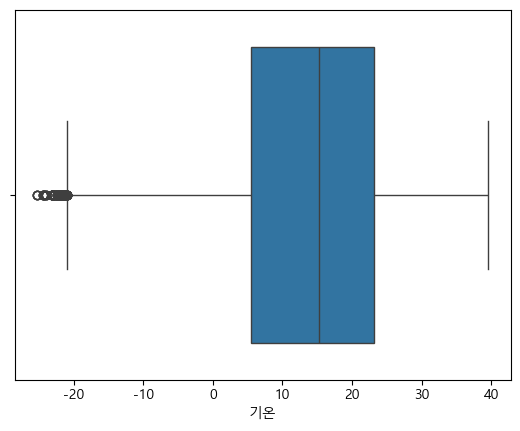

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 기온 열에서 이상치 구하기
q1 = df['기온'].quantile(0.25)
q3 = df['기온'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 데이터만 추출
outliers = df[(df['기온'] < lower_bound) | (df['기온'] > upper_bound)]

# 이상치 값만 저장 (Series 형태)
outlier_values = outliers['기온']

# 출력
print("이상치 값:")
print(outlier_values)

sns.boxplot(x=df['기온'])
plt.show()